# Literature Search & Analyses

In [1]:
# To install LISC (for example, if you are running on Colab) run this cell
#!pip install lisc

In [2]:
from lisc import Counts
from lisc.plts.counts import plot_matrix

In [3]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

## The Pubmed API

Base URL: `https://eutils.ncbi.nlm.nih.gov/entrez/eutils/`

Search URL: `https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=<DATABASE>&term=<TERM>`

## Search for Country Information

First, lets explore where research is talking about. 

Which countries are mentioned in COVID research?

In [4]:
# Define search terms for COVID
covid_terms = [['covid-19', 'covid19', 'coronavirus-19', 'coronavirus19']]

# Define some country terms to search for 
country_terms = [['united states', 'USA'], ['mexico'], ['canada']]

In [5]:
# Initialize counts object & add the terms that we want to collect co-occurrences for
counts_country = Counts()
counts_country.add_terms(covid_terms, dim='A')
counts_country.add_terms(country_terms, dim='B')

In [6]:
# Collect co-occurrence data
counts_country.run_collection(verbose=True)

Running counts for:  covid-19


In [7]:
# Check the count values
counts_country.counts[0]

array([1163,   68,  164])

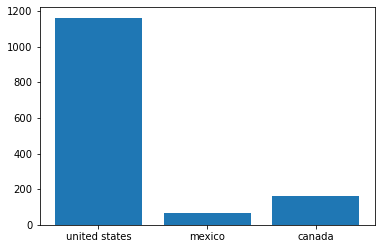

In [8]:
# Plot the results of the counts by country
plt.bar([0, 1, 2], counts_country.counts[0])
plt.xticks([0, 1, 2], counts_country.terms['B'].labels);

## Search for Symptom Information

Next, lets explore what symptoms are being discussed in the research. 

In [9]:
# Set up some terms to search for
covid_terms = [['covid-19', 'covid19', 'coronavirus-19', 'coronavirus19']]
symptom_terms = [['heart', 'circulation'], ['lung', 'breathing'], ['stomach', 'digestion']]

# Initialize counts object & add the terms that we want to collect co-occurrences for
counts_symptom = Counts()
counts_symptom.add_terms(covid_terms, dim='A')
counts_symptom.add_terms(symptom_terms, dim='B')

In [10]:
# Collect co-occurrence data
counts_symptom.run_collection(verbose=True)

Running counts for:  covid-19


In [11]:
# Check the count values
counts_symptom.counts[0]

array([ 828, 1769,   25])

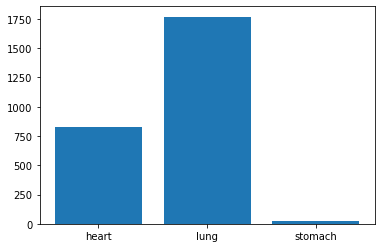

In [12]:
# Plot the results of the counts across symptoms
plt.bar([0, 1, 2], counts_symptom.counts[0])
plt.xticks([0, 1, 2], counts_symptom.terms['B'].labels);

## Compare Between Diseases

Finally, lets compare the COVID literature to other, potentially similar, diseases. 

In [13]:
# Set up some terms to search for
disease_terms = [['covid-19', 'covid19', 'coronavirus-19', 'coronavirus19'], 
                 ['influenza'], ['asthma'], ['diabetes']]
symptom_terms = [['heart', 'circulation'],
                 ['lung', 'respiratory'],
                 ['stomach', 'digestion']]

# Initialize counts object & add the terms that we want to collect co-occurrences for
counts_disease = Counts()
counts_disease.add_terms(disease_terms, dim='A')
counts_disease.add_terms(symptom_terms, dim='B')

In [14]:
# Collect co-occurrence data
counts_disease.run_collection(verbose=True)

Running counts for:  covid-19
Running counts for:  influenza
Running counts for:  asthma
Running counts for:  diabetes


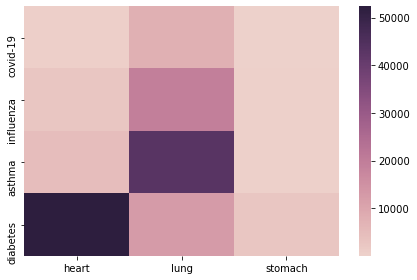

In [15]:
# Plot a matrix of the number of articles per search term
plot_matrix(counts_disease.counts,
            counts_disease.terms['B'].labels,
            counts_disease.terms['A'].labels)

In [16]:
# Compute a normalization of the co-occurrence data
counts_disease.compute_score('normalize', dim='A')

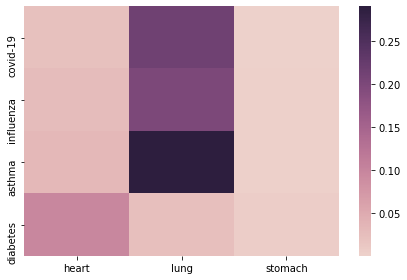

In [17]:
# Plot a matrix of the  normalized data
plot_matrix(counts_disease.score,
            counts_disease.terms['B'].labels,
            counts_disease.terms['A'].labels)

## Mini Chatbot Example

In [18]:
# 
print("Which two terms would you like to know how many papers there are about.")

Which two terms would you like to know how many papers there are about.


In [19]:
# Mini-mini chatbot
term1 = input('What is term 1: ')

What is term 1: stress


In [20]:
# Mini-mini chatbot
term2 = input('What is term 2: ')

What is term 2: meditation


In [21]:
print("Searching for terms: {} \t & {}".format(term1, term2))

Searching for terms: stress 	 & meditation


In [22]:
# Convert string to a list
term1 = [term1]
term2 = [term2]

In [23]:
# Run literature collection
chat_counts = Counts()
chat_counts.add_terms(term1, dim='A')
chat_counts.add_terms(term2, dim='B')
chat_counts.run_collection()

In [28]:
# Check how many papers found for the given search terms
chat_counts.counts

array([[1430]])